In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

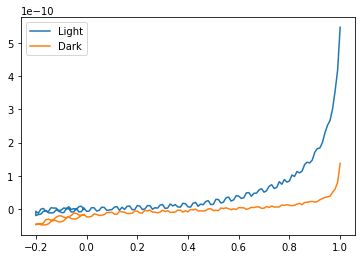

In [17]:
solar_light = "MNDLAB_10_19042023/Solar/I_V Sweep-Solar cell-dark [Solar cell(9) ; 4_19_2023 5_43_30 PM].csv"
solar_dark = "MNDLAB_10_19042023/Solar/I_V Sweep-Solar cell-light [Solar cell(10) ; 4_19_2023 5_45_38 PM].csv"
column = ['V1','I1']
df_light = pd.read_csv(solar_light, usecols=column)
df_dark = pd.read_csv(solar_dark, usecols=column)
plt.plot(df_light.V1[:141],df_light.I1[:141])
plt.plot(df_dark.V1[:141],df_dark.I1[:141])
plt.legend(['Light','Dark'])


In [18]:
df_light = df_light[:141]
df_dark = df_dark[:141]

## log(I) vs V 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


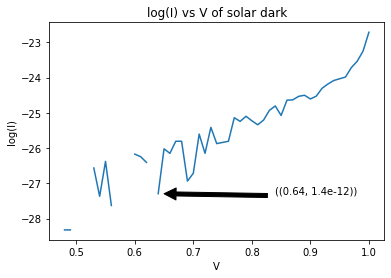

In [19]:

plt.title(f"log(I) vs V of solar dark")
plt.xlabel("V")
plt.ylabel("log(I)")

Vmax = [np.argmax(np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)))]
Imax = (np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1))).max()
xy=(np.array(df_dark.V1)[Vmax][0],np.array(df_dark.I1)[Vmax][0])
# print(xy)


plt.plot(df_dark.V1,np.log(df_dark.I1))
plt.annotate(f'({np.array(df_dark.V1)[Vmax][0],np.array(df_dark.I1)[Vmax][0]})', xy=(np.array(df_dark.V1)[Vmax][0],np.log(np.array(df_dark.I1)[Vmax][0])), xytext=(np.array(df_dark.V1)[Vmax]+0.2,np.log(np.array(df_dark.I1)[Vmax][0])),
 arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


## α vs V plot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[36] nan


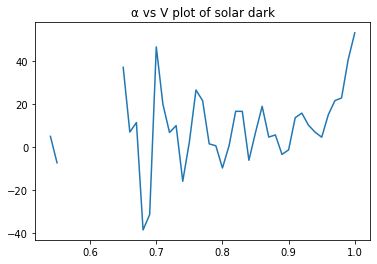

In [20]:

plt.title(f"α vs V plot of solar dark")
Vmax = [np.argmax(np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)))]
Imax = (np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1))).max()
max_index = np.argmax(np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)))
# print(np.array(df_dark.V1)[max_index],np.array(np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)))[max_index],df_dark.I1[max_index])
# print(df_dark.V1,np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)),df_dark.I1)
plt.plot(df_dark.V1,np.gradient(np.log(df_dark.I1))/np.gradient(np.log(df_dark.V1)))
# Annotate the point at (3, 6)
plt.annotate(f'({np.array(df_dark.V1)[Vmax][0]}, {Imax})', xy=(np.array(df_dark.V1)[Vmax][0],Imax), xytext=(np.array(df_dark.V1)[Vmax]+0.2,Imax),
     arrowprops=dict(facecolor='red', shrink=0.02))
print(Vmax,Imax)
plt.show()
# if i > 0:
#     print(f"V = {np.array(df_dark.V1)[i]}, alpha = {np.gradient(np.log(df_dark.I1)[i])/np.gradient(np.log(df_dark.V1)[i])}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34  # Planck constant
c = 3e8  # Speed of light
k = 1.38e-23  # Boltzmann constant
T = 300  # Temperature in Kelvin
q = 1.6e-19  # Electron charge
n = 1.5  # Refractive index of the solar cell

# Bandgap range
Eg = np.linspace(0.1, 3.5, 100)  # Bandgap in eV

# Calculation of parameters
eta_c = 1 - 0.5 * np.sqrt(Eg / (Eg + 0.8))
eta_t = ((n * Eg) ** 0.5 - n * Eg) / ((n * Eg) ** 0.5 + n * Eg)
eta_r = ((n * Eg) ** 0.5 - 1) / ((n * Eg) ** 0.5 + 1)
eta_q = 1 - np.exp(-q * Eg / (k * T))
eta_ext = 0.75

J_sc = q * n ** 2 * c * (Eg * 1.6e-19) ** 2 / (2 * h ** 3) * \
    (1 - np.exp(-q * Eg / (k * T)))
V_oc = k * T / q * np.log(J_sc / (q * n ** 2 * c))

P_in = 1000  # Power density of incoming photons in W/m^2

# Calculation of maximum PCE
PCE_max = (eta_c * eta_t * eta_r * eta_q * eta_ext) * (J_sc * V_oc / P_in)

# Plotting
plt.plot(Eg, PCE_max * 100)
plt.xlabel('Bandgap (eV)')
plt.ylabel('Maximum Power Conversion Efficiency (%)')
plt.title('Shockley-Queisser Limit')
plt.show()
